# Import libraries

### Standard libraries

In [22]:
#you have to make sure that you have all of these installed
import cProfile
import re
import math
import numpy as np
import scipy as sp
from scipy import stats
from scipy import optimize as opt
import pandas as pd
import random as rnd
from matplotlib import pyplot as plt
import time
import numpy.random
import warnings
warnings.filterwarnings('ignore')
import multiprocessing as mp

### Custom build

In [2]:
import chen_utils as ch
import user_simulation_utils as sim

## Function to generate observed data

In [3]:
rate_input = 0.3
share_observed = 0.7
observations_total = 7
print(rate_input, share_observed, observations_total)

0.3 0.7 7


In [4]:
type(sim.simulate_data()[0])

numpy.ndarray

## Set of functions for Chen Model, including
- Custom gamma function
- Chen pdf and cdf
- Chen pdf summing over all possible k's
- Function accounting for right censoring
- Likelihood function accounting for all IPT observations
- Solver function (performing grid search)
- Plot function
- Pipeline function executing all functions in the respective order

In [5]:
x = sim.simulate_data()
p = 0.5
beta = 0.5
#runtime estimate
x

[array([ 10.89137374,   1.20842404,   6.45357491,  14.88010635,
          4.36227465,   4.25281117,  16.64814006,  18.2935035 ,
          2.76672231,   5.40805486,   4.96089087,   0.75862208,
          9.18711358,   6.13814847,  21.1624289 ,   8.59584475,
         12.72168178,   8.22119479,   7.81925312,  16.61838199]), 0]

In [6]:
#check function call
ch._gamma_calc(x[1],2 * (np.array(range(101))+1),0.5).shape

(1, 101)

In [9]:
np.random.seed(1234)
true_param = [0.5,0.5]
x = sim.simulate_data(true_param[0], true_param[1], 100)
ch.maximum_likelihood_estimate(x)

[[0.52500000000000002, 0.47500000000000003], 3.3544381804858493e-133]

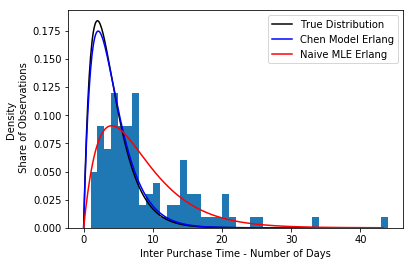

True SOW 0.5
Chen SOW 0.525
True beta 0.5
Chen beta 0.475
Naive beta 0.246483402217


In [10]:
ch.total_pipeline(x, true_param)

## Metropolis Simulation
so from here onwards we are simulating parameter pairs using the Metropolis-Hastings algorithm

In [11]:
p = 0.6
beta = 0.4
x = sim.simulate_data(beta,p, 60)
traj = ch.metropolis(x, starting_point = [0.5,0.5],chain_length = 5000, burn_in = 0.2)
print(traj)

[[ 0.42697008  0.57276997]
 [ 0.42697008  0.57276997]
 [ 0.42697008  0.57276997]
 ..., 
 [ 0.35929237  0.65031639]
 [ 0.35929237  0.65031639]
 [ 0.35929237  0.65031639]]


In [10]:
x

[array([ 24.71062137,   6.99326157,   6.50827662,   1.9969418 ,
         23.77869001,  11.15403862,   3.37967397,   5.90454673,
         11.43553058,   5.52678083,  24.08431148,   2.72254472,
          8.21647734,   9.1819978 ,   7.10399645,   2.64806385,
          2.7460171 ,   4.3089925 ,   7.1743395 ,   7.14308843,
          3.8961428 ,   7.24042932,   1.20979013,   7.42027775,
          6.57617247,   1.09111557,   0.61863018,   7.20347059,
         42.5941273 ,   6.06569325,   5.37880198,   2.7763459 ,
          8.09561917,   8.77648786,  10.98405096,   7.63436722,
          7.55571838,  20.62609736,  12.57206735,   3.36336209,
          2.92946916,   5.62146593,   9.19075908,  18.89254115,
          0.43744348,  18.27340094,  16.47262318,  10.12417296,
         10.1960705 ,   2.06710341,  19.4184893 ,   5.47342536,
         11.71397339,   4.33197612,   2.79820984,  14.70799679,
          7.5835689 ,   6.29638479,   1.84747889,   2.55871926]),
 4.1593177726786656]

In [11]:
print(np.mean(traj[:,0]), np.mean(traj[:,1]))

0.474804857128 0.577202839161


In [12]:
traj_new = ch.metropolis_new(x, starting_point = [0.5,0.5],chain_length = 5000, burn_in = 0.2)

In [13]:
np.mean(traj_new, axis = 0)

array([ 0.45335536,  0.57649189])

In [14]:
x

[array([ 24.71062137,   6.99326157,   6.50827662,   1.9969418 ,
         23.77869001,  11.15403862,   3.37967397,   5.90454673,
         11.43553058,   5.52678083,  24.08431148,   2.72254472,
          8.21647734,   9.1819978 ,   7.10399645,   2.64806385,
          2.7460171 ,   4.3089925 ,   7.1743395 ,   7.14308843,
          3.8961428 ,   7.24042932,   1.20979013,   7.42027775,
          6.57617247,   1.09111557,   0.61863018,   7.20347059,
         42.5941273 ,   6.06569325,   5.37880198,   2.7763459 ,
          8.09561917,   8.77648786,  10.98405096,   7.63436722,
          7.55571838,  20.62609736,  12.57206735,   3.36336209,
          2.92946916,   5.62146593,   9.19075908,  18.89254115,
          0.43744348,  18.27340094,  16.47262318,  10.12417296,
         10.1960705 ,   2.06710341,  19.4184893 ,   5.47342536,
         11.71397339,   4.33197612,   2.79820984,  14.70799679,
          7.5835689 ,   6.29638479,   1.84747889,   2.55871926]),
 4.1593177726786656]

In [29]:
cProfile.run('ch.metropolis_new(x, starting_point = [0.5,0.5],chain_length = 5000, burn_in = 0.1)')

         5673274 function calls (5662449 primitive calls) in 12.673 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:989(_handle_fromlist)
        1    0.000    0.000   12.735   12.735 <string>:1(<module>)
    10825    0.004    0.000    0.004    0.000 <string>:2(_parse_args)
        1    0.000    0.000    0.000    0.000 <string>:5(_parse_args_rvs)
    10825    0.147    0.000    0.147    0.000 _continuous_distns.py:1978(_cdf)
    21644    0.058    0.000    0.495    0.000 _continuous_distns.py:379(_pdf)
    21644    0.437    0.000    0.437    0.000 _continuous_distns.py:382(_logpdf)
        1    0.000    0.000    0.000    0.000 _continuous_distns.py:4893(_rvs)
    21650    0.991    0.000    5.707    0.000 _distn_infrastructure.py:1619(pdf)
    10825    0.554    0.000    2.275    0.000 _distn_infrastructure.py:1702(cdf)
    32469    0.226    0.000    3.

In [30]:
%timeit ch.metropolis_new(x, starting_point = [0.5,0.5],chain_length = 5000, burn_in = 0.1)

1 loop, best of 3: 8.79 s per loop


In [15]:
np.max(traj_new[:,1])

1.8161243307592783

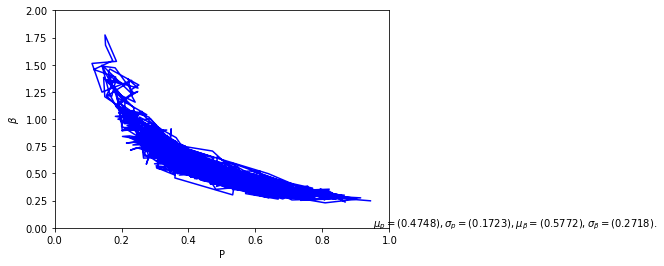

In [16]:
ch.plot_trajectory(traj)

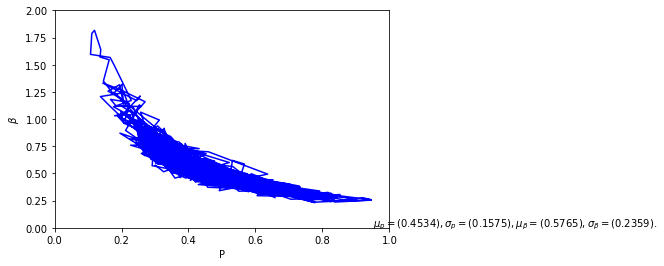

In [17]:
ch.plot_trajectory(traj_new)

[-188.26867712 -188.26867712 -188.26867712 ..., -186.01082084 -186.01082084
 -186.01082084]


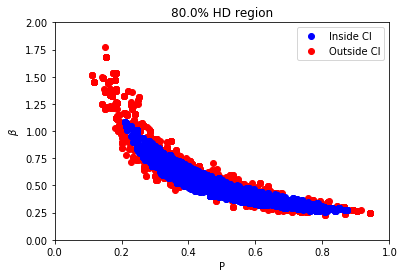

In [18]:
ch.plot_region(traj, x, 80.0)

In [19]:
p = 0.6
beta = 0.3
x = sim.simulate_data(beta,p, 60)
time0 = time.time()
traj = ch.metropolis(x, starting_point = [0.5,0.5],chain_length = 100000, burn_in = 0.2)
print(time.time()-time0)
print(traj)

181.61224484443665
[[ 0.09646851  1.95949828]
 [ 0.09646851  1.95949828]
 [ 0.09646851  1.95949828]
 ..., 
 [ 0.29242333  0.65080326]
 [ 0.29242333  0.65080326]
 [ 0.22866486  0.68407161]]


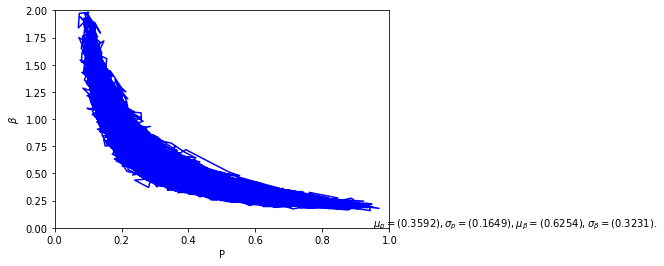

[-207.19229174 -207.19229174 -207.19229174 ..., -203.1138449  -203.1138449
 -203.62981182]


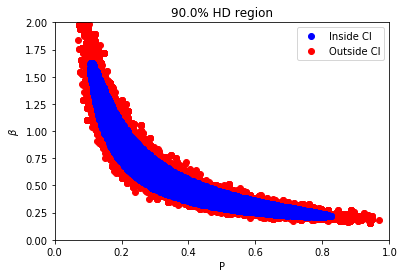

In [20]:
ch.plot_trajectory(traj)
ch.plot_region(traj, x, 90.0)

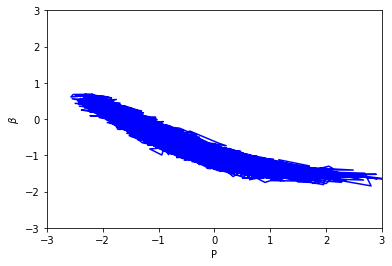

In [56]:
acceptedTraj = np.column_stack((sim.logit(traj[:,0]), np.log(traj[:,1])))

# Display the sampled points
"""Consider square shaped plot"""
# par( pty="s" ) # makes plots in square axes.
XY = np.transpose(acceptedTraj)
plt.plot(XY[0], XY[1], 'b')
plt.xlim([-3.0, 3.0])
plt.ylim([-3.0, 3.0])
plt.xlabel('P')
plt.ylabel(r'$\beta$')
# Display means and rejected/accepted ratio in plot.
if (meanTraj[0] > .5):
    xpos, xadj = 0.01, 0.01
else:
    xpos, xadj = 0.95, 0.95
if (meanTraj[1] > .5):
    ypos, yadj = 0.01, 0.01
else:
    ypos, yadj = 0.95, 0.95
plt.show()